In [62]:
import numpy as np
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop

In [63]:
import os
from PIL import Image

In [64]:
target_size = (224, 224)

# Define the path to your training dataset
train_path = 'dataset'

In [65]:
# Loop through all subdirectories in the training dataset directory
for class_dir in os.listdir(train_path):
    class_path = os.path.join(train_path, class_dir)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            # Check if the file is an image
            if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                # Construct the path to the image file
                img_path = os.path.join(class_path, filename)
                # Open the image file using PIL
                img = Image.open(img_path)
                # Convert the image to grayscale
                img_gray = img.convert("L")
                # Invert the grayscale image (convert white to black and vice versa)
                img_inverted = Image.eval(img_gray, lambda x: 255 - x)
                # Resize the inverted grayscale image to the target size
                img_inverted = img_inverted.resize(target_size)
                # Save the inverted grayscale image
                img_inverted.save(img_path)
            else:
                continue

In [66]:
# Data Preprocessing
target_size = (224, 224)
num_classes = 2
batch_size = 4

In [67]:
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    validation_split=0.2
)


In [68]:
train_generator = datagen.flow_from_directory(
    'dataset',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',  # Use 'binary' for binary classification
    subset='training'
)

Found 83 images belonging to 2 classes.


In [69]:
val_generator = datagen.flow_from_directory(
    'dataset',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',  # Use 'binary' for binary classification
    subset='validation'
)

Found 20 images belonging to 2 classes.


In [70]:
# Build Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

In [71]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [72]:
# Train your model
history = model.fit(train_generator,
                    epochs=25,
                    validation_data=val_generator)


Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 260ms/step - accuracy: 0.5921 - loss: 0.7366 - val_accuracy: 0.5000 - val_loss: 0.6816
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - accuracy: 0.6038 - loss: 0.7752 - val_accuracy: 0.7500 - val_loss: 0.3713
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - accuracy: 0.7701 - loss: 0.5379 - val_accuracy: 0.7000 - val_loss: 1.0240
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 0.9666 - loss: 0.1290 - val_accuracy: 0.8500 - val_loss: 0.4138
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 0.9512 - loss: 0.1340 - val_accuracy: 0.8500 - val_loss: 0.3201
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 0.9710 - loss: 0.0743 - val_accuracy: 0.7500 - val_loss: 1.0485
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - accuracy: 1.0000 - loss: 0.0168 - val_accuracy: 0.6000 - val_loss: 1.8164
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 0.9353 - loss: 0.1723 - val_accuracy: 0.

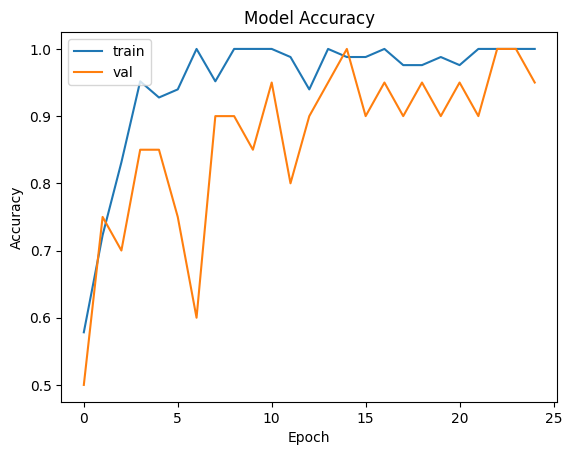

In [73]:
# Plot the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [74]:
# Save Model
model.save('binary_classification_model.h5')

In [89]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

In [90]:
# Load the saved model
loaded_model = load_model('binary_classification_model.h5')

In [91]:
# Define the image dimensions and number of classes
img_width, img_height = 224, 224

In [92]:
# Load and preprocess your uploaded image
img = image.load_img('WhatsApp Image 2024-04-17 at 14.47.29_3630984f.jpg', target_size=(img_width, img_height))

# Convert the image to grayscale
img_gray = img.convert("L")

# Invert the grayscale image (convert white to black and vice versa)
img_inverted = Image.eval(img_gray, lambda x: 255 - x)

# Convert the grayscale image to an array
img_array = image.img_to_array(img_inverted)

# Duplicate the single channel to create three channels (RGB)
img_rgb = np.repeat(img_array, 3, axis=-1)

# Reshape the image to match the model's input shape
img_rgb = np.expand_dims(img_rgb, axis=0)
img_rgb /= 255.  # Normalize the pixel values


In [93]:
# Use your model to predict the class of the uploaded image
pred = model.predict(img_rgb)
print(pred)

# Determine the predicted class based on the probability score
class_label = "onkar_sign" if pred > 0.5 else "aniket_sign"
print("Predicted class:", class_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[[1.3054818e-09]]
Predicted class: aniket_sign
